In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !cp '/content/drive/MyDrive/deep_learning_project/dogs/models.py' .
# !cp '/content/drive/MyDrive/deep_learning_project/dogs/train_eval.py' .
# !cp '/content/drive/MyDrive/deep_learning_project/dogs/data.py' .

In [4]:
import pickle
import os
from models import *
from data import *
from train_eval import *
from torch.utils.data import Subset
import random


## Import Data

In [5]:
PATH = '/home/sshad/hw/duplicate/final/data/dogs/'
# PATH = '/content/drive/MyDrive/deep_learning_project/dogs/'


TRAIN_PATH = PATH + 'dog_train_resized'
TRAIN_LABELS= PATH + 'dog_train_labels.csv'
VAL_PATH = PATH + 'dog_val_resized'
VAL_LABELS = PATH + 'dog_val_labels.csv'
TEST_PATH = PATH + 'dog_test_resized'
TEST_LABELS = PATH + 'dog_test_labels.csv'

In [6]:
train = DogsDataset(path=TRAIN_PATH, label_csv=TRAIN_LABELS)
valid = DogsDataset(path=VAL_PATH, label_csv=VAL_LABELS)
test  = DogsDataset(path=TEST_PATH, label_csv=TEST_LABELS)

In [7]:
BATCH_SIZE = 64

In [8]:
train_dl = DataLoader(train, BATCH_SIZE, shuffle=True)
val_dl = DataLoader(valid, BATCH_SIZE)
test_dl = DataLoader(test, BATCH_SIZE)

## Model Setup

In [9]:
loss = nn.CrossEntropyLoss()

## Hyperparameter Search

In [10]:
LEARNING_RATES = [1e-4, 1e-3, 1e-2] # 1e-4 is the LR used in the paper
WEIGHT_DECAYS = [1e-4, 1e-3, 1e-2]

### Generate Subsample of Data

In [9]:
# Set the desired sample size
sample_size = 500

# Generate all indices for the dataset
all_indices = list(range(len(train)))

# Take a random sample of indices
sampled_indices = random.sample(all_indices, sample_size)

# Create a Subset object with the sampled indices
train_sampled_ds = Subset(train, sampled_indices)

In [10]:
# Generate all indices for the dataset
all_indices = list(range(len(valid)))

# Take a random sample of indices
sampled_indices = random.sample(all_indices, sample_size)

# Create a Subset object with the sampled indices
val_sampled_ds = Subset(valid, sampled_indices)

In [11]:
train_dl_sampled = DataLoader(train_sampled_ds, BATCH_SIZE, shuffle=True)
val_dl_sampled = DataLoader(val_sampled_ds, BATCH_SIZE)

### Resnet34

In [ ]:
resnet34 = ResNet(version='resnet34')
results_dict_resnet34, results_df = grid_search(resnet34, 
                                                train_dl_sampled, 
                                                val_dl_sampled, 
                                                loss, 
                                                LEARNING_RATES,
                                                WEIGHT_DECAYS)

### Resnet50

In [ ]:
resnet50 = ResNet() #default is resnet50
results_dict_resnet50, results_df_resnet_50 = grid_search(resnet50, 
                                                          train_dl_sampled, 
                                                          val_dl_sampled, 
                                                          loss, 
                                                          LEARNING_RATES, 
                                                          WEIGHT_DECAYS)

#### Save Experimental Results

In [ ]:
# output_path = '/content/drive/MyDrive/deep_learning_project/dogs/resnet50_experiments.csv'
# results_df_resnet_50.to_csv(output_path, index=False)

### vit-DINO-v2

In [ ]:
dino = DINOv2()
#optim_dino = torch.optim.Adam(dino.parameters())
LEARNING_RATES_DINO = [5e-6,1e-4, 1e-3, 1e-2] # 5e-6 is the LR used in the paper 

results_dict_dinov2, results_df_dinov2 = grid_search(dino,
                                                     train_dl_sampled,
                                                     val_dl_sampled,
                                                     loss,
                                                     LEARNING_RATES_DINO,
                                                     WEIGHT_DECAYS)

#### Save Experimental Results

In [ ]:
# output_path = '/content/drive/MyDrive/deep_learning_project/dogs/dinov2_experiments.csv'
# results_df_dinov2.to_csv(output_path, index=False)

## Train Models with Optimized Hyperparameters

### RESNET34

In [11]:
resnet34 = ResNet(version='resnet34')
# optimized parameters found via experimentation
optim_res34 = torch.optim.Adam(resnet34.parameters(), lr=.01, weight_decay=.0001)
res34_results = train_model_with_early_stopping(resnet34,
                                                train_dl,
                                                val_dl,
                                                loss,
                                                optimizer=optim_res34,
                                                num_epochs= 25,
                                                patience = 3)
res34_evals = evaluate_model(resnet34, val_dl)

Epoch 1/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  5.95it/s]


Train Loss: 0.4709, Val Loss: 0.7837, Val Acc: 71.33%
Epoch 2/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.37it/s]


Train Loss: 0.3320, Val Loss: 0.8736, Val Acc: 71.61%
Epoch 3/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.39it/s]


Train Loss: 0.3844, Val Loss: 0.7427, Val Acc: 78.02%
Epoch 4/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.39it/s]


Train Loss: 0.3357, Val Loss: 0.5002, Val Acc: 80.94%
Epoch 5/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.37it/s]


Train Loss: 0.3248, Val Loss: 0.5111, Val Acc: 80.33%
Epoch 6/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.42it/s]


Train Loss: 0.2545, Val Loss: 0.4941, Val Acc: 80.50%
Epoch 7/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.38it/s]


Train Loss: 0.3164, Val Loss: 1.0500, Val Acc: 73.39%
Epoch 8/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  6.23it/s]


Train Loss: 0.3195, Val Loss: 0.5483, Val Acc: 78.18%
Epoch 9/25


Validation: 100%|██████████| 57/57 [00:08<00:00,  6.34it/s]


Train Loss: 0.3049, Val Loss: 0.7694, Val Acc: 76.73%
Early stopping triggered. Training stopped at epoch 9.


### RESNET50

In [12]:
resnet50 = ResNet()
optim_res50 = torch.optim.Adam(resnet50.parameters(), lr=.01, weight_decay=.001) # optimized parameters found via experimentation
res50_results = train_model_with_early_stopping(resnet50, train_dl, val_dl, loss, optimizer=optim_res50, num_epochs= 25, patience = 3)
res50_evals = evaluate_model(resnet50, val_dl)

Epoch 1/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  5.82it/s]


Train Loss: 0.3926, Val Loss: 0.3826, Val Acc: 82.36%
Epoch 2/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  5.83it/s]


Train Loss: 0.2823, Val Loss: 0.3730, Val Acc: 83.20%
Epoch 3/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  5.79it/s]


Train Loss: 0.2527, Val Loss: 0.4674, Val Acc: 80.55%
Epoch 4/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  5.80it/s]


Train Loss: 0.2421, Val Loss: 0.5620, Val Acc: 78.91%
Epoch 5/25


Validation: 100%|██████████| 57/57 [00:09<00:00,  5.81it/s]


Train Loss: 0.2495, Val Loss: 0.3909, Val Acc: 82.59%
Early stopping triggered. Training stopped at epoch 5.


### dinoV2

In [13]:
dino = DINOv2()
optim_dino = torch.optim.Adam(dino.parameters(), lr=.01, weight_decay=.0001) # optimized hyperparameters found via experimentation
dinov2_results = train_model_with_early_stopping(dino,
                                                 train_dl,
                                                 val_dl,
                                                 loss,
                                                 optimizer=optim_dino,
                                                 num_epochs= 25,
                                                 patience = 3)
dinov2_evals = evaluate_model(dino, val_dl)

Epoch 1/25


Validation: 100%|██████████| 57/57 [00:10<00:00,  5.20it/s]


Train Loss: 0.8427, Val Loss: 0.5659, Val Acc: 84.01%
Epoch 2/25


Validation: 100%|██████████| 57/57 [00:10<00:00,  5.36it/s]


Train Loss: 0.3242, Val Loss: 0.4674, Val Acc: 82.06%
Epoch 3/25


Validation: 100%|██████████| 57/57 [00:11<00:00,  4.95it/s]


Train Loss: 0.2713, Val Loss: 0.8992, Val Acc: 80.27%
Epoch 4/25


Validation: 100%|██████████| 57/57 [00:10<00:00,  5.24it/s]


Train Loss: 0.2689, Val Loss: 0.6617, Val Acc: 81.22%
Epoch 5/25


Validation: 100%|██████████| 57/57 [00:11<00:00,  5.17it/s]


Train Loss: 0.3334, Val Loss: 0.5571, Val Acc: 82.72%
Early stopping triggered. Training stopped at epoch 5.


In [25]:
# Validation Results
res34_evals, res50_evals, dinov2_evals

({'majority_accuracy': 0.8181818181818182,
  'majority_precision': 0.8823529411764706,
  'majority_recall': 0.7777777777777778,
  'frame_accuracy': 0.7673446642518807},
 {'majority_accuracy': 0.9772727272727273,
  'majority_precision': 0.9814814814814814,
  'majority_recall': 0.9722222222222222,
  'frame_accuracy': 0.8258567846196713},
 {'majority_accuracy': 0.8863636363636364,
  'majority_precision': 0.8856209150326797,
  'majority_recall': 0.8782051282051282,
  'frame_accuracy': 0.8272499303427139})

In [15]:
# Save training/validation results

with open('saved_output/res34_training.pkl', 'wb') as f:
    pickle.dump(res34_results, f)
with open('saved_output/res34_eval.pkl', 'wb') as f:
    pickle.dump(res34_evals, f)

with open('saved_output/res50_training.pkl', 'wb') as f:
    pickle.dump(res50_results, f)
with open('saved_output/res50_eval.pkl', 'wb') as f:
    pickle.dump(res50_evals, f)

with open('saved_output/dinov2_training.pkl', 'wb') as f:
    pickle.dump(dinov2_results, f)
with open('saved_output/dinov2_eval.pkl', 'wb') as f:
    pickle.dump(dinov2_evals, f)

# with open('saved_output/saved_dictionary.pkl', 'rb') as f:
    # loaded_dict = pickle.load(f)

#### Save Models

In [16]:
OUT_PATH = '/home/sshad/dog-emotion-classification/saved_output'

torch.save(resnet34.state_dict(), OUT_PATH + '/resnet34_trained.pkl')
torch.save(resnet50.state_dict(), OUT_PATH + '/resnet50_trained.pkl')
torch.save(dino.state_dict(), OUT_PATH + '/dino_trained.pkl')

## Model Evaluation

In [24]:
res34_test = evaluate_model(resnet34, test_dl)
res50_test = evaluate_model(resnet50, test_dl)
dino_test = evaluate_model(dino, test_dl)
res34_test, res50_test, dino_test

({'majority_accuracy': 0.8888888888888888,
  'majority_precision': 0.8834459459459459,
  'majority_recall': 0.803475935828877,
  'frame_accuracy': 0.8482721382289417},
 {'majority_accuracy': 0.9111111111111111,
  'majority_precision': 0.9027777777777777,
  'majority_recall': 0.8489304812834224,
  'frame_accuracy': 0.8031857451403888},
 {'majority_accuracy': 0.8222222222222222,
  'majority_precision': 0.7762605042016807,
  'majority_recall': 0.8516042780748663,
  'frame_accuracy': 0.7842872570194385})

In [27]:
with open('saved_output/res34_test.pkl', 'wb') as f:
    pickle.dump(res34_test, f)
with open('saved_output/res50_test.pkl', 'wb') as f:
    pickle.dump(res50_test, f)
with open('saved_output/dino_test.pkl', 'wb') as f:
    pickle.dump(dino_test, f)

In [ ]:
def load_model_state_dict(model, file_path, device='cpu'):
    """Load a PyTorch model's state dictionary from a file."""
    model.load_state_dict(torch.load(file_path, map_location=device))
    model.eval()  # Set the model to evaluation mode
    print(f"Model state dictionary loaded from {file_path}")
    return model

In [ ]:
resnet34 = ResNet(version='resnet34')
file_path = PATH + 'final_trained_models/resnet34_trained_model.pkl'
pickle_model = load_model_state_dict(model = resnet34, file_path = file_path)

Model state dictionary loaded from /content/drive/MyDrive/deep_learning_project/dogs/final_trained_models/resnet34_trained_model.pkl


In [18]:
res34_test = evaluate_model(resnet34, test_dl)
res34_test

{'majority_accuracy': 0.8888888888888888,
 'majority_precision': 0.8834459459459459,
 'majority_recall': 0.803475935828877,
 'frame_accuracy': 0.8482721382289417}

In [ ]:
resnet50 = ResNet()
file_path = PATH + 'final_trained_models/resnet50_trained_model.pkl'
pickle_model_resnet50 = load_model_state_dict(model = resnet50, file_path = file_path)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s]


Model state dictionary loaded from /content/drive/MyDrive/dogs/resnet50_trained_model.pkl


In [ ]:
resnet50_test = evaluate_model(pickle_model_resnet50, test_dl)
resnet50_test

{'majority_accuracy': 0.9111111111111111,
 'majority_precision': 0.8689903846153846,
 'majority_recall': 0.910427807486631,
 'frame_accuracy': 0.7535097192224622}

In [ ]:
dino = DINOv2()
file_path = PATH + 'final_trained_models/dinov2_trained_model.pkl'
dino_pickle = load_model_state_dict(model = dino, file_path = file_path)

Model state dictionary loaded from /content/drive/MyDrive/dogs/dinov2_trained_model.pkl


In [ ]:
dinov2_test = evaluate_model(dino_pickle, test_dl)
dinov2_test

{'majority_accuracy': 0.8444444444444444,
 'majority_precision': 0.7952586206896552,
 'majority_recall': 0.8663101604278074,
 'frame_accuracy': 0.7640388768898488}

# Create Visualizations

In [ ]:
training_path = PATH + 'final_model_training_metrics/res34_training.pkl'
eval_path = PATH + 'final_model_training_metrics/res34_eval.pkl'

with open(training_path, 'rb') as file:
    res34_training = pickle.load(file)

with open(eval_path, 'rb') as file:
    res34_eval = pickle.load(file)

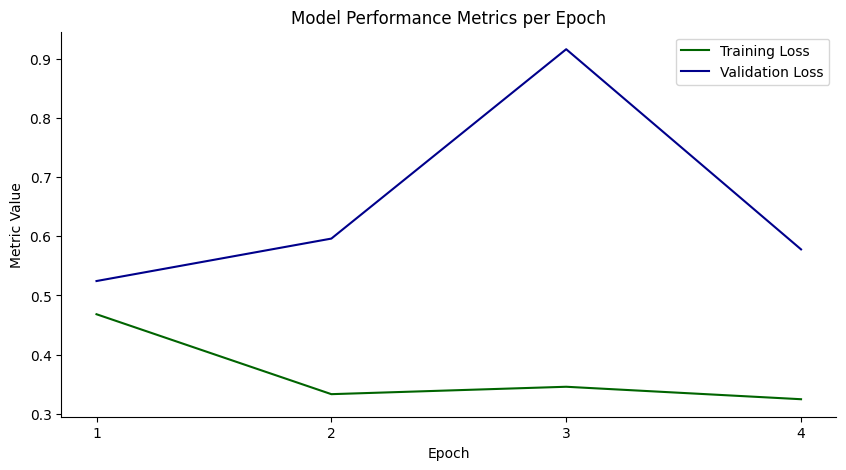

In [ ]:
epochs = range(1, len(res34_training['Training Loss']) + 1)

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, res34_training['Training Loss'], color='darkgreen', label='Training Loss')
plt.plot(epochs, res34_training['Validation Loss'], color='darkblue', label='Validation Loss')

# Labeling the axes
plt.xlabel('Epoch')
plt.ylabel('Metric Value')

# Adding title and legend
plt.title('Model Performance Metrics per Epoch')
plt.legend()

# Customizing the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customizing the x-axis to show only integer labels
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()


In [ ]:
training_path = PATH + 'final_model_training_metrics/res50_training.pkl'
eval_path = PATH + 'final_model_training_metrics/res50_eval.pkl'

with open(training_path, 'rb') as file:
    res50_training = pickle.load(file)

with open(eval_path, 'rb') as file:
    res50_eval = pickle.load(file)

In [ ]:
res50_training

{'Training Loss': [0.38395055942934614,
  0.27441424075886506,
  0.27313350683737486,
  0.26210468731317893,
  0.23888596286950434,
  0.233060633649562,
  0.24975331859981306],
 'Validation Loss': [0.3872579510380013,
  0.42268155899244486,
  0.4417495851099541,
  0.373097956363256,
  0.3875547435563333,
  0.48096521756349414,
  0.3927205847677463],
 'Validation Accuracy': [83.81164669824463,
  82.44636388966286,
  80.07801616049039,
  84.14600167177487,
  83.53301755363611,
  79.26999164112566,
  83.72805795486208]}

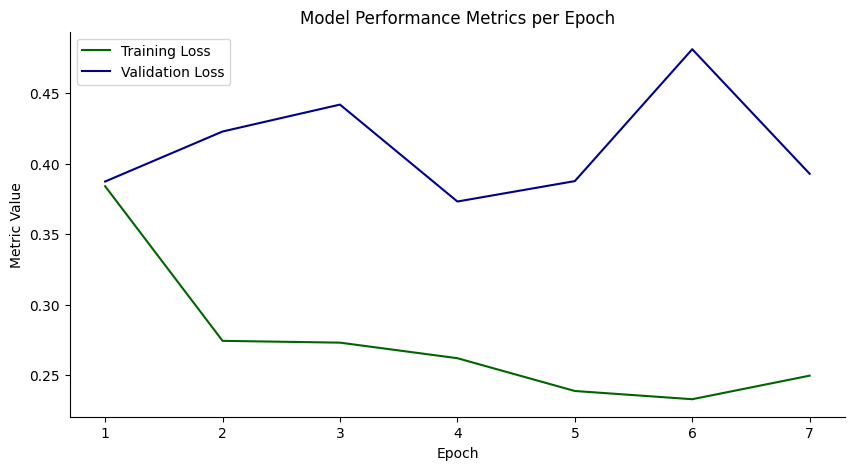

In [ ]:
epochs = range(1, len(res50_training['Training Loss']) + 1)

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, res50_training['Training Loss'], color='darkgreen', label='Training Loss')
plt.plot(epochs, res50_training['Validation Loss'], color='darkblue', label='Validation Loss')

# Labeling the axes
plt.xlabel('Epoch')
plt.ylabel('Metric Value')

# Adding title and legend
plt.title('Model Performance Metrics per Epoch')
plt.legend()

# Customizing the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customizing the x-axis to show only integer labels
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [ ]:
training_path = PATH + 'final_model_training_metrics/dinov2_training.pkl'
eval_path = PATH + 'final_model_training_metrics/dinov2_eval.pkl'

with open(training_path, 'rb') as file:
    dino_training = pickle.load(file)

with open(eval_path, 'rb') as file:
    dino_eval = pickle.load(file)

In [ ]:
dino_training